In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**load the data in the dataframe**

In [3]:
#read the data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UDKAZw-kz18Yj8P6icf_qw/survey-data-duplicates.csv"
df = pd.read_csv(file_path)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**identify and analyze duplicates**

In [4]:
#counting the number of duplicate rows in the dataset
#identifing duplicate rows with duplicated() method, and count with sum() method
duplicates_count = df.duplicated().sum()
print(f'Number of duplicated rows: {duplicates_count}')

#displaying the first few duplicate rows
duplicated_rows = df[df.duplicated(keep=False)]
print(duplicated_rows)

Number of duplicated rows: 10
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
5               6                        I code primarily as a hobby   
6               7  I am not primarily a developer, but I write co...   
7               8                              I am learning to code   
8               9                        I code primarily as a hobby   
9              10                     I am a developer by profession   
65437           1                     I am a developer by profession   
65438           2                     I am a developer by profession   
65439           3                 

**analyze characteristics of duplicates**

In [5]:
#identifing which columns have the same values in duplicate rows
from collections import Counter

duplicates = df[df.duplicated(keep=False)]

#grouping duplicated rows by all columns
grouped = duplicates.groupby(list(duplicates.columns)).size().reset_index(name='counts')

same_values = {}
for col in duplicates.columns:
    same_values[col] = duplicates.groupby(list(duplicates.columns))[col].nunique().eq(1).all()
    converted_values = [bool(v) for v in same_values.values()]

value_counts = Counter(converted_values)
print(f"True count: {value_counts[True]}")
print(f"False count: {value_counts[False]}")


C:\Users\Nurana\AppData\Local\Temp\ipykernel_13388\1392073419.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  grouped = duplicates.groupby(list(duplicates.columns)).size().reset_index(name='counts')
C:\Users\Nurana\AppData\Local\Temp\ipykernel_13388\1392073419.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  grouped = duplicates.groupby(list(duplicates.columns)).size().reset_index(name='counts')
C:\Users\Nurana\AppData\Local\Temp\ipykernel_13388\1392073419.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

True count: 114
False count: 0


In [6]:
#analyzing the distribution of duplicates across different columns such as Country, Employment, and DevType.

categories = ['Country', 'Employment', 'DevType']
for i, duplicates in enumerate(categories):
    duplicates = df[df.duplicated(keep=False)]
    same_values_columns = duplicates.groupby(categories[i]).size().reset_index(name='Counts')

    print(same_values_columns)

                                             Country  Counts
0                                             Canada       2
1                                             Norway       2
2                                             Serbia       2
3  United Kingdom of Great Britain and Northern I...       6
4                           United States of America       6
5                                         Uzbekistan       2
                                          Employment  Counts
0                                Employed, full-time      10
1  Independent contractor, freelancer, or self-em...       2
2                                 Student, full-time       6
3  Student, full-time;Not employed, but looking f...       2
                 DevType  Counts
0    Academic researcher       4
1   Developer Experience       2
2  Developer, full-stack       8
3                Student       4


**visualize duplicates distribution**

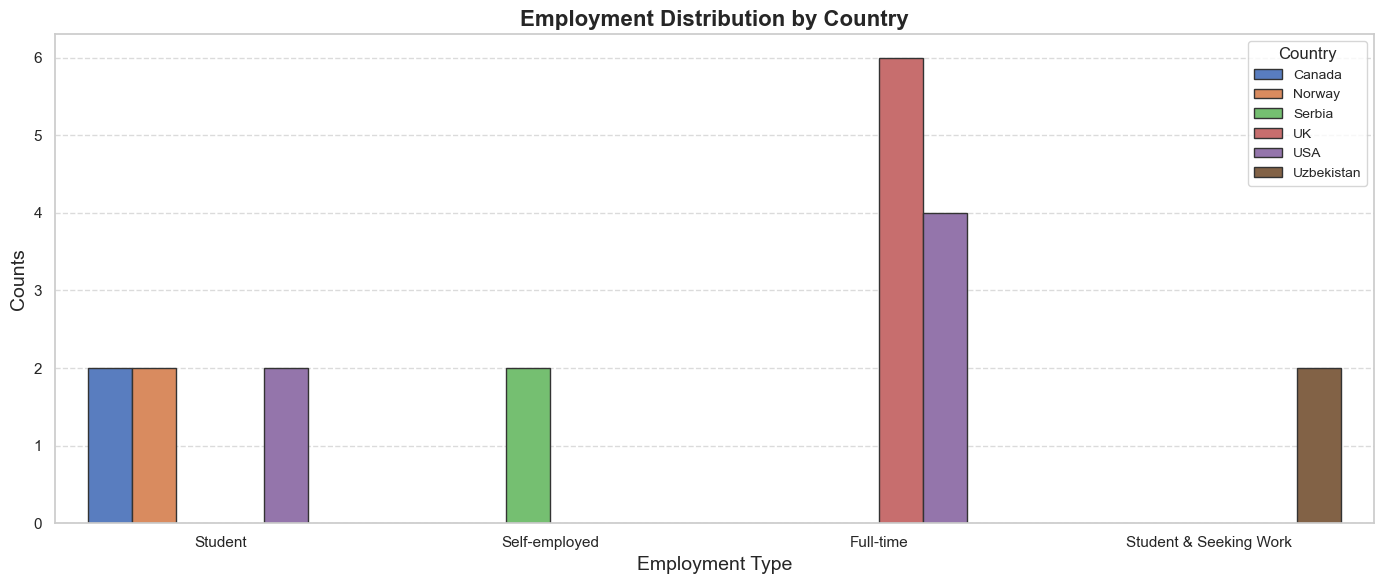

In [17]:
#creating visualizations to represent the distribution of duplicates by Country and Employment.

import seaborn as sns

grouped = duplicates.groupby(['Country', 'Employment']).size().reset_index(name='Counts')

grouped['Country'] = grouped['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
grouped['Country'] = grouped['Country'].replace('United States of America', 'USA')

#mapping of long descriptions to short ones in Employment column
emp_mapping = {
    'Employed, full-time': 'Full-time',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Student, full-time': 'Student',
    'Student, full-time;Not employed, but looking for work': 'Student & Seeking Work'
}
grouped['Employment'] = grouped['Employment'].replace(emp_mapping)

#visualization
plt.figure(figsize=(14,6))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(
    data=grouped, 
    x='Employment', 
    y='Counts', 
    hue='Country',
    palette='muted',
    edgecolor="0.2")

plt.title("Employment Distribution by Country", fontsize=16, fontweight='bold')
plt.xlabel("Employment Type", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend(title="Country", title_fontsize=12, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**strategic removal of duplicates**

In [18]:
#deciding which columns are critical for defining uniqueness in the dataset.
#threshold for unique counts and NaN values
unique_threshold = 0.35 * len(df) 
nan_threshold = 0.5 * len(df)  

critical_columns = [
    col for col in df.columns
    if (df[col].nunique() >= unique_threshold) and (df[col].isna().sum() <= nan_threshold)
]

print("Critical columns:", critical_columns)

Critical columns: ['ResponseId', 'LanguageHaveWorkedWith']


In [19]:
#removing duplicates based on a subset of columns if complete row duplication is not a good criterion.
#subset of columns for defining uniqueness
subset_columns = ['ResponseId', 'LanguageHaveWorkedWith']

unique_data = df.drop_duplicates(subset=subset_columns, keep='first')
print(unique_data)

       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time                     

In [20]:
#checking for duplicates in the subset
is_unique = not unique_data.duplicated(subset=subset_columns).any()
print(f"Are all rows unique now? {is_unique}")

Are all rows unique now? True
